In [176]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from numpy import random
import random as r

crossoverRandCoef = random.choice([0, 1, 2, 3])
bestOverall = []
noise_scale = 100
number_of_samples = 50
a = 25*(np.random.rand(number_of_samples, 1) - 0.8)
b = 5 * a + 20 * a**2 + 1 * a**3 + noise_scale*np.random.randn(number_of_samples, 1)


x1 = []
y1 = []

for i in range(50):
    x1.append(a[i][0])
    y1.append(b[i][0])
    
#get predictions and fitness for the random arrays
for z in range(1000):
    
    #create array of 100 random four element arrays
    coefficientArrs = []
    for x in range(200):
        coefficientArr = []
        for y in range(4):
            coefficientArr.append(random.uniform(-60, 60))
            coefficientArrs.append(coefficientArr)
    
    
    fitnessArr = []
    mseTotal = 0
    for i in range(200):
        for j in range(50):
            prediction = coefficientArrs[i][0]*x1[j]**3 + coefficientArrs[i][1]*x1[j]**2 + coefficientArrs[i][2]*x1[j] + coefficientArrs[i][3]

            mse = (prediction - y1[j])**2
            mseTotal += mse
        fitnessArr.append(mseTotal)
        mseTotal = 0

    #find index of ten best coefficient arrays
    bestCoeffArr = []
    for x in range(10):
        currMin = fitnessArr.index(min(fitnessArr))
        bestCoeffArr.append(currMin)
        fitnessArr[currMin] = 1000000000

    #create children using mutation and crossover
    mutationIndex = random.randint(0, 9)
    randIndices = r.sample([0,1,2,3,4,5,6,7,8,9], 6)
    children = []
    for x in range(10):
        #mutation rate is .1 so always just pick one element to mutate
        if x == mutationIndex:
            randCoef = random.choice([0, 1, 2, 3])
            randMultiplier = random.uniform(.8, 1.2)
            childCoef = coefficientArrs[bestCoeffArr[x]][randCoef] * randMultiplier
            coefficientArrs[bestCoeffArr[x]][randCoef] = childCoef

        #crossover - single arithmetic, rate is .6 so using 6 parents
        if x == randIndices[0]:
            tempCoef = coefficientArrs[bestCoeffArr[randIndices[0]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[0]]][crossoverRandCoef] = coefficientArrs[bestCoeffArr[randIndices[3]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[3]]][crossoverRandCoef] = tempCoef

        if x == randIndices[1]:
            tempCoef = coefficientArrs[bestCoeffArr[randIndices[1]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[1]]][crossoverRandCoef] = coefficientArrs[bestCoeffArr[randIndices[4]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[4]]][crossoverRandCoef] = tempCoef

        if x == randIndices[2]:
            tempCoef = coefficientArrs[bestCoeffArr[randIndices[2]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[2]]][crossoverRandCoef] = coefficientArrs[bestCoeffArr[randIndices[5]]][crossoverRandCoef]
            coefficientArrs[bestCoeffArr[randIndices[5]]][crossoverRandCoef] = tempCoef


        children.append([bestCoeffArr[x], coefficientArrs[bestCoeffArr[x]]])

    #find best child array
    childFitnessArr = []
    mseTotal = 0
    for i in range(10):
        for j in range(50):
                prediction = children[i][1][0]*x1[j]**3 + children[i][1][1]*x1[j]**2 + children[i][1][2]*x1[j] + children[i][1][3]

                mse = (prediction - y1[j])**2  
                mseTotal += mse
        childFitnessArr.append(mseTotal)
        mseTotal = 0

    bestOverall.append(children[childFitnessArr.index(min(childFitnessArr))][1])

#just put all of the above in a loop and then find best coefficients out of 'bestOverall'
bestFitnessArr = []
for i in range(1000):
        for j in range(50):
            prediction = bestOverall[i][0]*x1[j]**3 + bestOverall[i][1]*x1[j]**2 + bestOverall[i][2]*x1[j] + bestOverall[i][3]

            mse = (prediction - y1[j])**2
            mseTotal += mse
        bestFitnessArr.append(mseTotal)
        mseTotal = 0

resultIndex = bestFitnessArr.index(min(bestFitnessArr))
result = bestOverall[resultIndex]
print(result)

/var/folders/2p/lh7zshkn3_b0k0vs8b8b3yqm0000gn/T/ipykernel_11770/1781222102.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[1.5063138870068604, 28.73252420507714, 14.094536014601204, -33.12352621366394]


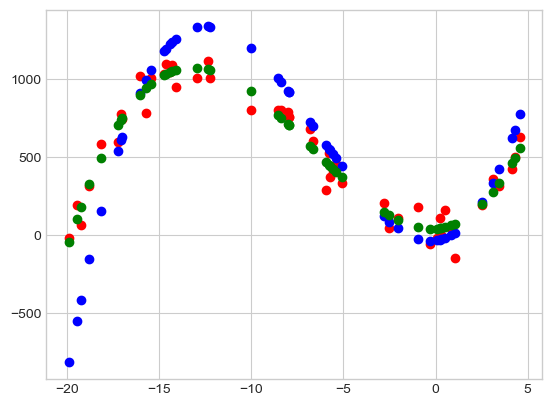

In [177]:
#generate predictions based on coefficients found in above algorithm
yHat = []
for j in range(50):
    prediction = result[0]*x1[j]**3 + result[1]*x1[j]**2 + result[2]*x1[j] + result[3]
    yHat.append(prediction)
    
xs = np.linspace(-20, 5, 50)
plt.plot(a,b,'ro')
plt.plot(a, yHat, 'bo')


#fitting a polynomial with the same data for comparison
coefficients1 = np.polyfit(x1, y1, 3)

yHatHw1 = []
for j in range(50):
    prediction = coefficients1[0]*x1[j]**3 + coefficients1[1]*x1[j]**2 + coefficients1[2]*x1[j] + coefficients1[3]
    yHatHw1.append(prediction)


predictions = PolyCoefficients(xs, coefficients1)

plt.plot(a, yHatHw1, 'go')


